In [1]:
import pandas as pd
import itertools
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
#import scikit_posthocs as sp

In [2]:
save_images = False
file = "results_feat.csv"
sep = ","
enc = "utf-8"

df = pd.read_csv(file, sep=sep, header=0, encoding=enc)

In [3]:
knns = [30]
reg_strengths = [0.1]

cp_args = list(itertools.product(*[reg_strengths, knns]))
n_cp_args = len(cp_args)

stat_cols = ["|S_M|", "|S_P|"]

ite_vars = [
    "|SSp1|", "|SSp2|", "|SSp3|", "|SSp4|", "|SSp5|",
    "|SR1|", "|SR2|", "|SR3|", "|SR4|", "|SR5|"
   ]

for post in ["_M", "_P"]:
    for ite_var in ite_vars:
        stat_cols.append(ite_var + post)
    for feat in ["L", "P", "S", "V"]:
        stat_cols.append("mean({0}){1}".format(feat, post))
    for feat in ["L", "P", "S", "V"]:
        stat_cols.append("std({0}){1}".format(feat, post))
    for feat in ["L", "P", "S", "V"]:
        stat_cols.append("median({0}){1}".format(feat, post))
    stat_cols.append("mean(w){0}".format(post))
    stat_cols.append("std(w){0}".format(post))
    stat_cols.append("median(w){0}".format(post))

stats_list = n_cp_args * [None]

In [4]:
def diff(stat_df, col1, col2):
    d = stat_df.loc[:, col1] - stat_df.loc[:, col2]
    return d

for i in range(n_cp_args):
    reg_strength, knn = cp_args[i]
    tmp_df = df[(df["lambda"] == reg_strength) & (df["knn"] == knn)]
    
    #tmp_df = pd.merge(tmp_df, gt_df, how ="inner", on =["id"])
    
    print(np.min(tmp_df.loc[:, "n_ite_M"]))
    print(np.min(tmp_df.loc[:, "n_ite_P"]))
    
    stat_df = tmp_df.loc[:, stat_cols]
    d1_M = diff(stat_df, "|SR1|_M", "|SSp1|_M")
    d2_M = diff(stat_df, "|SSp2|_M", "|SR1|_M")
    d3_M = diff(stat_df, "|SR2|_M", "|SSp2|_M")
    d4_M = diff(stat_df, "|SSp3|_M", "|SR2|_M")
    d5_M = diff(stat_df, "|SR3|_M", "|SSp3|_M")
    d6_M = diff(stat_df, "|SSp4|_M", "|SR3|_M")
    d7_M = diff(stat_df, "|SR5|_M", "|SSp4|_M")
    d8_M = diff(stat_df, "|SSp5|_M", "|SR5|_M")
    
    d1_P = diff(stat_df, "|SR1|_P", "|SSp1|_P")
    d2_P = diff(stat_df, "|SSp2|_P", "|SR1|_P")
    d3_P = diff(stat_df, "|SR2|_P", "|SSp2|_P")
    d4_P = diff(stat_df, "|SSp3|_P", "|SR2|_P")
    d5_P = diff(stat_df, "|SR3|_P", "|SSp3|_P")
    d6_P = diff(stat_df, "|SSp4|_P", "|SR3|_P")
    d7_P = diff(stat_df, "|SR5|_P", "|SSp4|_P")
    d8_P = diff(stat_df, "|SSp5|_P", "|SR5|_P")
    
    rf = pd.DataFrame(data=[
        d1_M, d2_M, d3_M, d4_M, d5_M, d6_M, d7_M, d8_M, 
        d1_P, d2_P, d3_P, d4_P, d5_P, d6_P, d7_P, d8_P
    ]).transpose()
    rf.columns = [
        "d_sp1r1_M", #1
        "d_r1sp2_M", #2
        "d_sp2r2_M", #3
        "d_r2sp3_M", #4
        "d_sp3r3_M", #5
        "d_r3sp4_M", #6
        "d_sp4r5_M", #7
        "d_r5sp5_M", #8
        "d_sp1r1_P", #1
        "d_r1sp2_P", #2
        "d_sp2r2_P", #3
        "d_r2sp3_P", #4
        "d_sp3r3_P", #5
        "d_r3sp4_P", #6
        "d_sp4r5_P", #7
        "d_r5sp5_P", #8
    ]
    
    stat_df_ = pd.concat([stat_df, rf], axis=1)
    
    mean_stat = stat_df_.mean(axis=0)
    std_stat = stat_df_.std(axis=0)
    median_stat = stat_df_.median(axis=0)
    
    stats = pd.concat([mean_stat, std_stat, median_stat], axis=1).transpose()
    #index_str = "_{0:.3f}_{1}".format(reg_strength, knn)
    #stats.index = ["mean" + index_str, "std" + index_str, "median" + index_str]
    stats.index = ["mean", "std", "median"]
    print(stats["|SSp1|_M"] - stats["|SSp1|_P"])
    print(stats["|SSp2|_M"] - stats["|SSp2|_P"])
    print(stats["|SSp3|_M"] - stats["|SSp3|_P"])

    print(stats["|SR1|_M"] - stats["|SR1|_P"])
    print(stats["|SR2|_M"] - stats["|SR2|_P"])
    print(stats["|SR3|_M"] - stats["|SR3|_P"])
    stats_t = ((reg_strength, knn), stats, stat_df_)
    stats_list[i] = stats_t

2
3
mean     -194.172840
std       -92.959378
median   -180.000000
dtype: float64
mean     -345.061728
std      -132.467087
median   -330.000000
dtype: float64
mean     -526.086420
std      -179.828312
median   -500.000000
dtype: float64
mean     -194.148148
std       -93.588944
median   -180.000000
dtype: float64
mean     -337.271605
std      -132.795312
median   -321.000000
dtype: float64
mean     -500.962963
std      -178.629058
median   -471.000000
dtype: float64


In [5]:
def plot_bar(x, df, ylabel, labels, title, miny=None, maxy=None, xticks=None):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)
    plt.rc("font", size=20)
    
    ax = f.add_axes([0,0,1,1])
    if miny is not None and maxy is not None:
        ax.set(ylim=[miny, maxy])
    width = 0.225    
    d_ = np.array(x, copy=True)
    d_ = d_.astype(np.float32)
    for i in range(df.shape[1]):
        c = "blue"
        #plt.plot(x, y[:, i], "x", label=labels[i])
        #print(y[:, i])
        if i % 2 == 0:
            c = "orange"
        ax.bar(x=d_, height=df.iloc[0, i], width=width, color=c)
        d_ += width
    #plt.legend()
    ax.legend(labels=labels)
    if xticks is not None:
        plt.xticks(x, xticks, rotation="vertical")
    plt.title(title)
    plt.ylabel(ylabel)
    #plt.show()

In [6]:
def plot_df(cp_args, n_cp_args, stats_list, ex_cols, col_names, title=None, use_log=False, describe=False, print_latex=False, val_multiplier=1, ylabel=None, xlabel=None):
    df_all = None
    for i in range(n_cp_args):
        ex_cols_ = ex_cols.copy()
        col_names_ = col_names.copy()
        #if i == 1 or i == 3 or i == 5:
        #if i == 1 or i == 3:
        #    del ex_cols_[2]
        #    del col_names_[2]
        df = stats_list[i][2].loc[:, ex_cols_].copy()
        if use_log:
            df = np.log10(df)
        col = []
        for c in col_names_:
            col.append(c + r"$({0}, {1})$".format(cp_args[i][0], cp_args[i][1]))
        df.columns = col
        #print(col[-1], df)
        if df_all is None:
            df_all = df
        else:
            df_all = pd.concat([df_all, df], axis=0)
    #print(df_all)
    if describe:
        print(df_all.describe(include="all"))
    if print_latex:
        df_desc = df_all.describe(include="all")
        #print(df_desc)
        df_desc = df_desc.loc[["mean", "std", "25%", "50%", "75%"]]
        df_desc = df_desc * val_multiplier
        latex_str = df_desc.to_latex(escape=False, float_format="%.2f")
        print(latex_str)
    df_all.plot(kind="box", figsize=(12,8), rot=90, title=title, grid=True, showmeans=True, ylabel=ylabel, xlabel=xlabel)

In [7]:
df_desc = stats_list[0][2].describe(include="all")

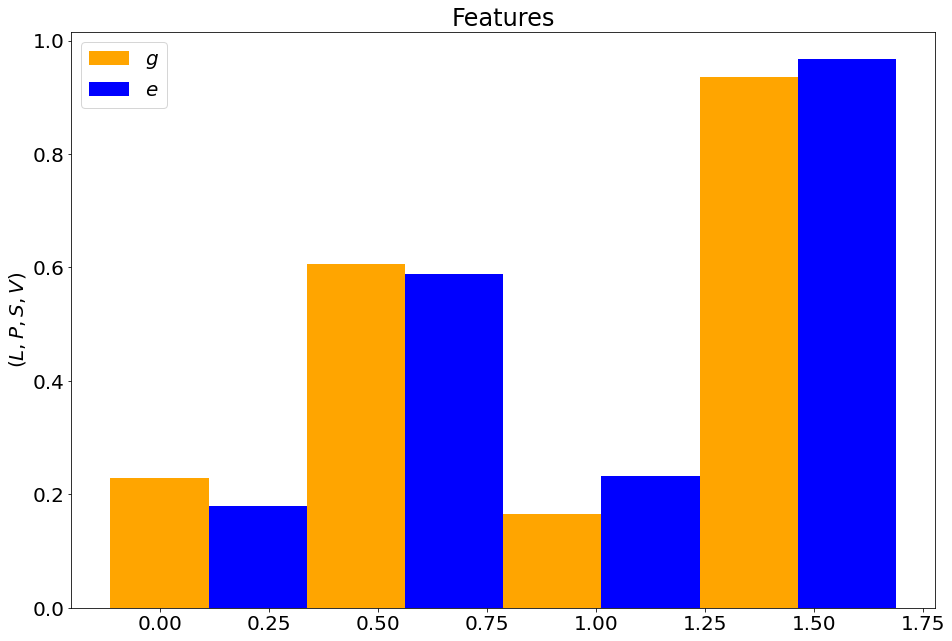

In [8]:
df_mean = df_desc.loc[["mean"],
                      [
                          "mean(L)_M", "mean(L)_P",
                          "mean(P)_M", "mean(P)_P",
                          "mean(S)_M", "mean(S)_P",
                          "mean(V)_M", "mean(V)_P"
                      ]
                     ]
x = np.arange(1, dtype=np.uint32)
plot_bar(x=x, df=df_mean, ylabel=r"$(L, P, S, V)$", labels=[r"$g$", r"$e$"], title=r"Features")
#plt.savefig("growth.png", bbox_inches="tight")

In [9]:
def autolabel(rects, ax):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%.3f'%float(h),
                ha='center', va='bottom')

def plot_bar1(x, df, labels, title, miny=None, maxy=None, xticks=None):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)
    plt.rc("font", size=20)
    
    ax = f.add_axes([0,0,1,1])
    if miny is not None and maxy is not None:
        ax.set(ylim=[miny, maxy])
    width = 0.225    
    d_ = np.array(x, copy=True)
    d_ = d_.astype(np.float32)
    
    r1 = ax.bar(d_, df.iloc[0, :4], width, color='g')
    r2 = ax.bar(d_ + width, df.iloc[0, 4:], width, color='r')
    
    autolabel(r1, ax)
    autolabel(r2, ax)
    #plt.legend()
    ax.legend(labels=labels)
    if xticks is not None:
        plt.xticks(x, xticks)
    plt.title(title)
    #plt.ylabel(ylabel)
    #plt.show()

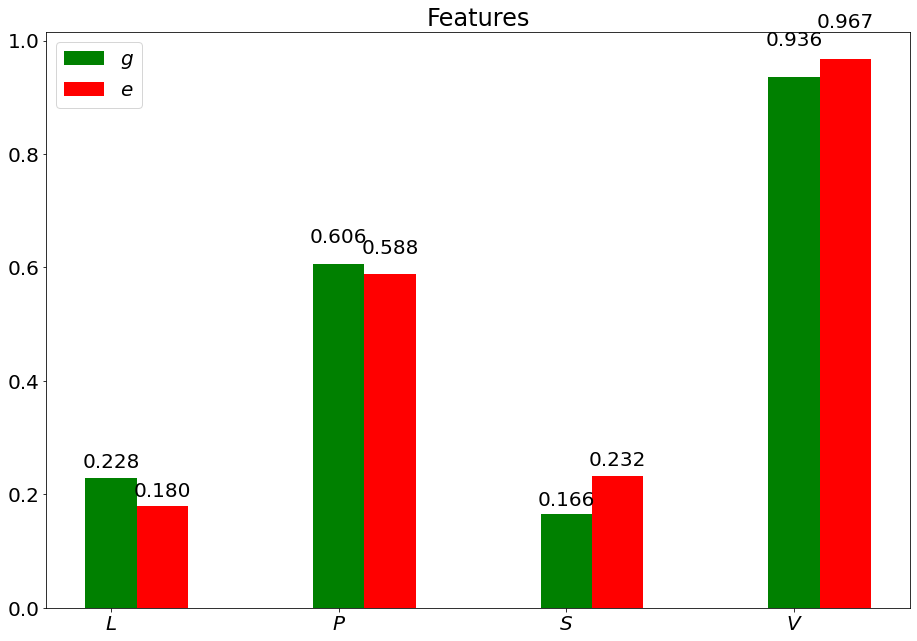

In [10]:
df_mean = df_desc.loc[["mean"],
                      [
                          "mean(L)_M", "mean(P)_M", "mean(S)_M", "mean(V)_M",
                          "mean(L)_P", "mean(P)_P", "mean(S)_P", "mean(V)_P"
                      ]
                     ]
x = np.arange(4, dtype=np.uint32)
plot_bar1(x=x, df=df_mean, xticks=[r"$L$", r"$P$", r"$S$", r"$V$"], labels=[r"$g$", r"$e$"], title=r"Features")
#plt.savefig("growth.png", bbox_inches="tight")

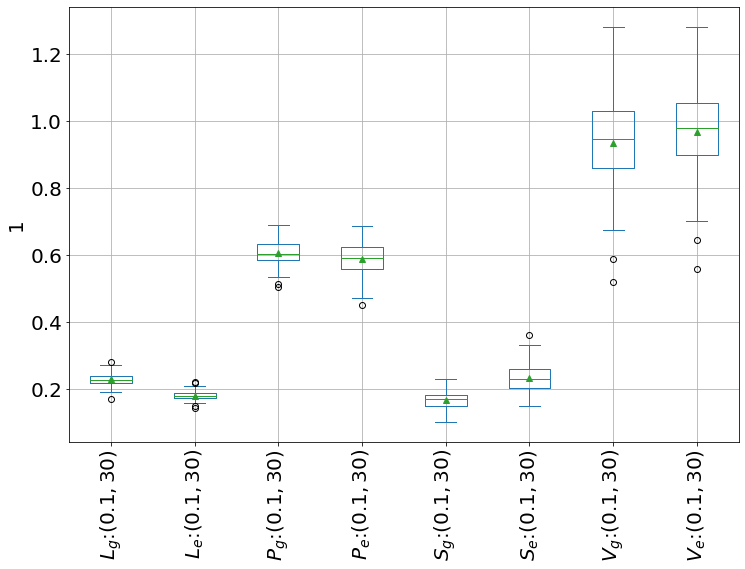

In [22]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$L_g$:", r"$L_e$:", r"$P_g$:", r"$P_e$:", r"$S_g$:", r"$S_e$:", r"$V_g$:", r"$V_e$:"],
       ex_cols=["mean(L)_M", "mean(L)_P", "mean(P)_M", "mean(P)_P", "mean(S)_M", "mean(S)_P", "mean(V)_M", "mean(V)_P"], ylabel=r"1")
if save_images:
    plt.savefig("mean_feats.png", bbox_inches="tight")

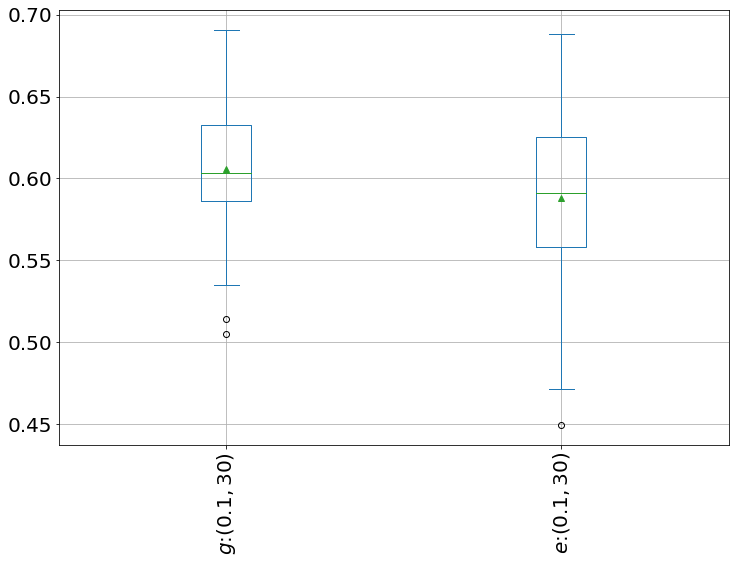

In [12]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["mean(P)_M", "mean(P)_P"])
if save_images:
    plt.savefig("mean_P.png", bbox_inches="tight")

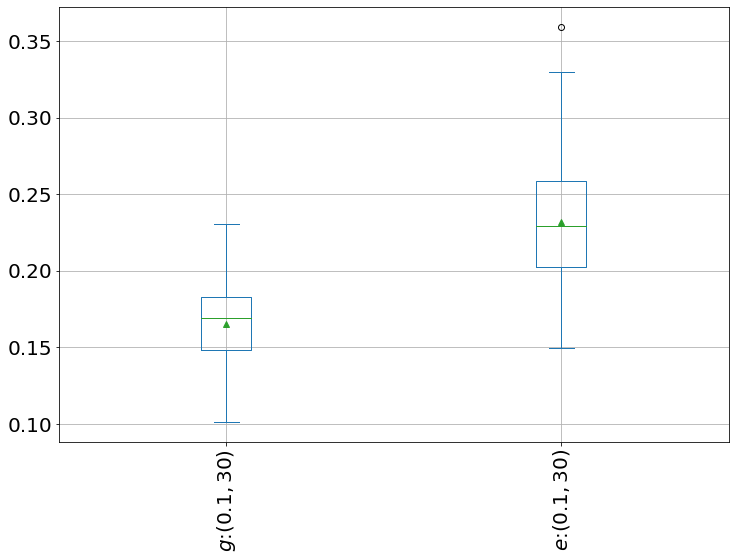

In [13]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["mean(S)_M", "mean(S)_P"])
if save_images:
    plt.savefig("mean_S.png", bbox_inches="tight")

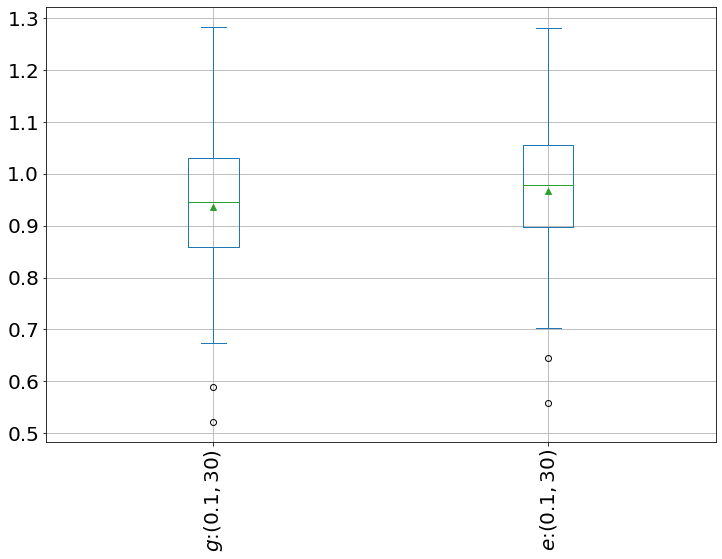

In [14]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["mean(V)_M", "mean(V)_P"])
if save_images:
    plt.savefig("mean_V.png", bbox_inches="tight")

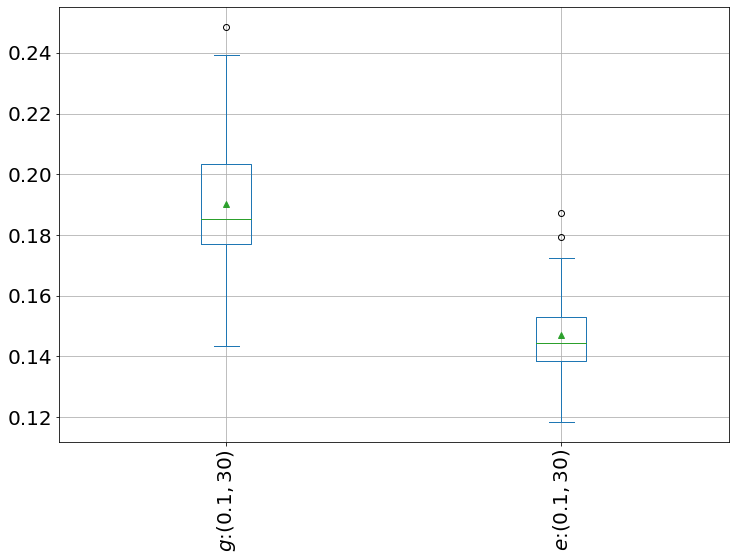

In [15]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["median(L)_M", "median(L)_P"])
if save_images:
    plt.savefig("median_L.png", bbox_inches="tight")

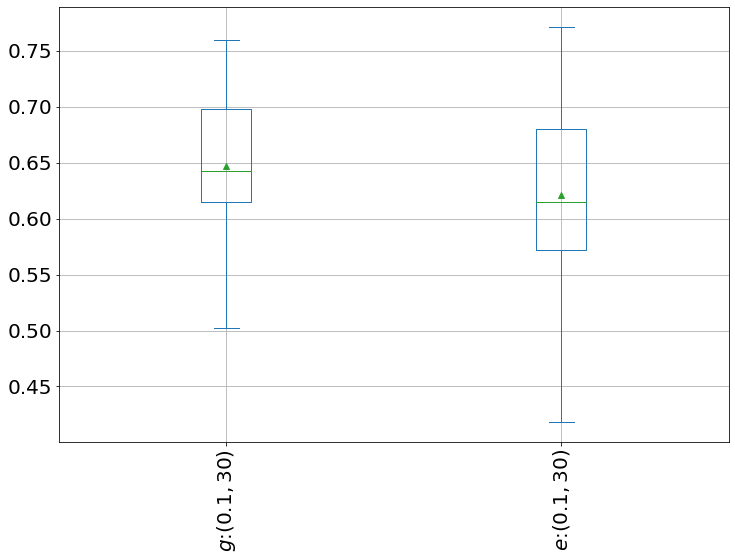

In [16]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["median(P)_M", "median(P)_P"])
if save_images:
    plt.savefig("median_P.png", bbox_inches="tight")

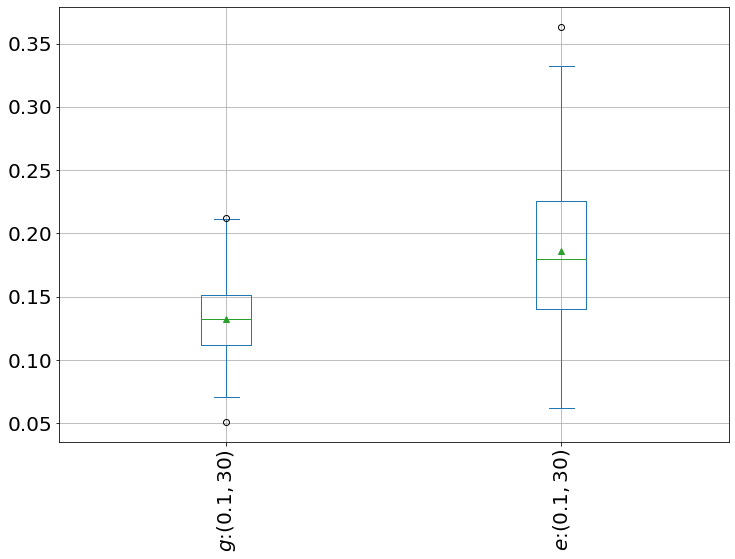

In [17]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["median(S)_M", "median(S)_P"])
if save_images:
    plt.savefig("median_S.png", bbox_inches="tight")

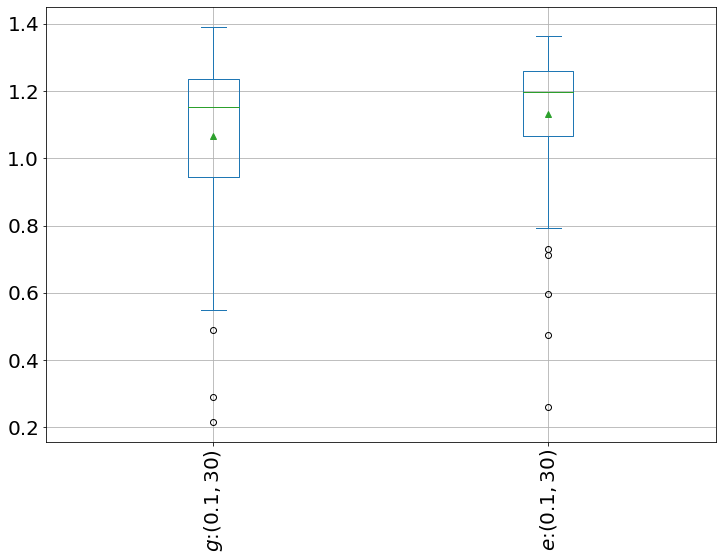

In [18]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["median(V)_M", "median(V)_P"])
if save_images:
    plt.savefig("median_V.png", bbox_inches="tight")

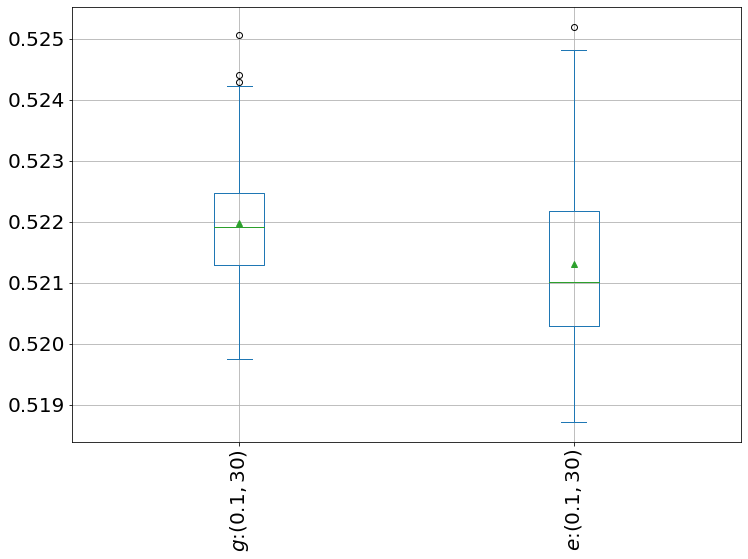

In [19]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["mean(w)_M", "mean(w)_P"])
if save_images:
    plt.savefig("mean_w.png", bbox_inches="tight")

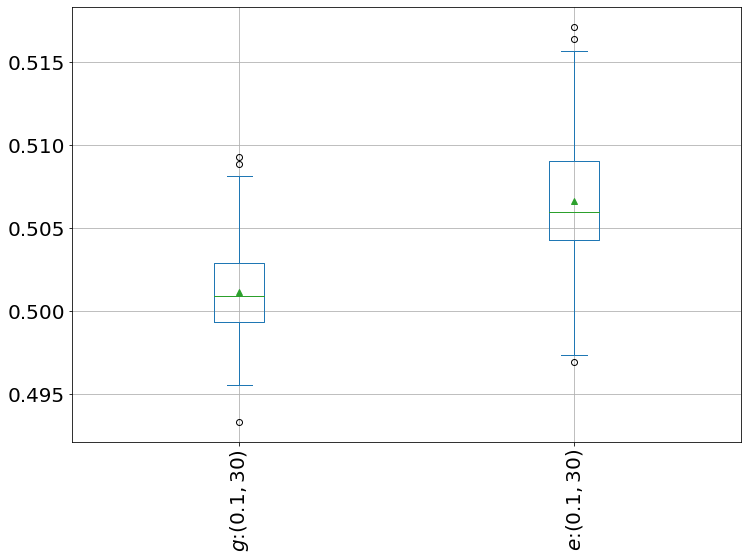

In [20]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["median(w)_M", "median(w)_P"])
if save_images:
    plt.savefig("median_w.png", bbox_inches="tight")